# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

________________________________________________________________________________
The banking data represents 17 marketing campaigns, as described in the article.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
# Check the data for null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


The data has no missing values.

In [ ]:
# Show the data types for each feature
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
# Split the data for X and y
X = df
y = df['y']

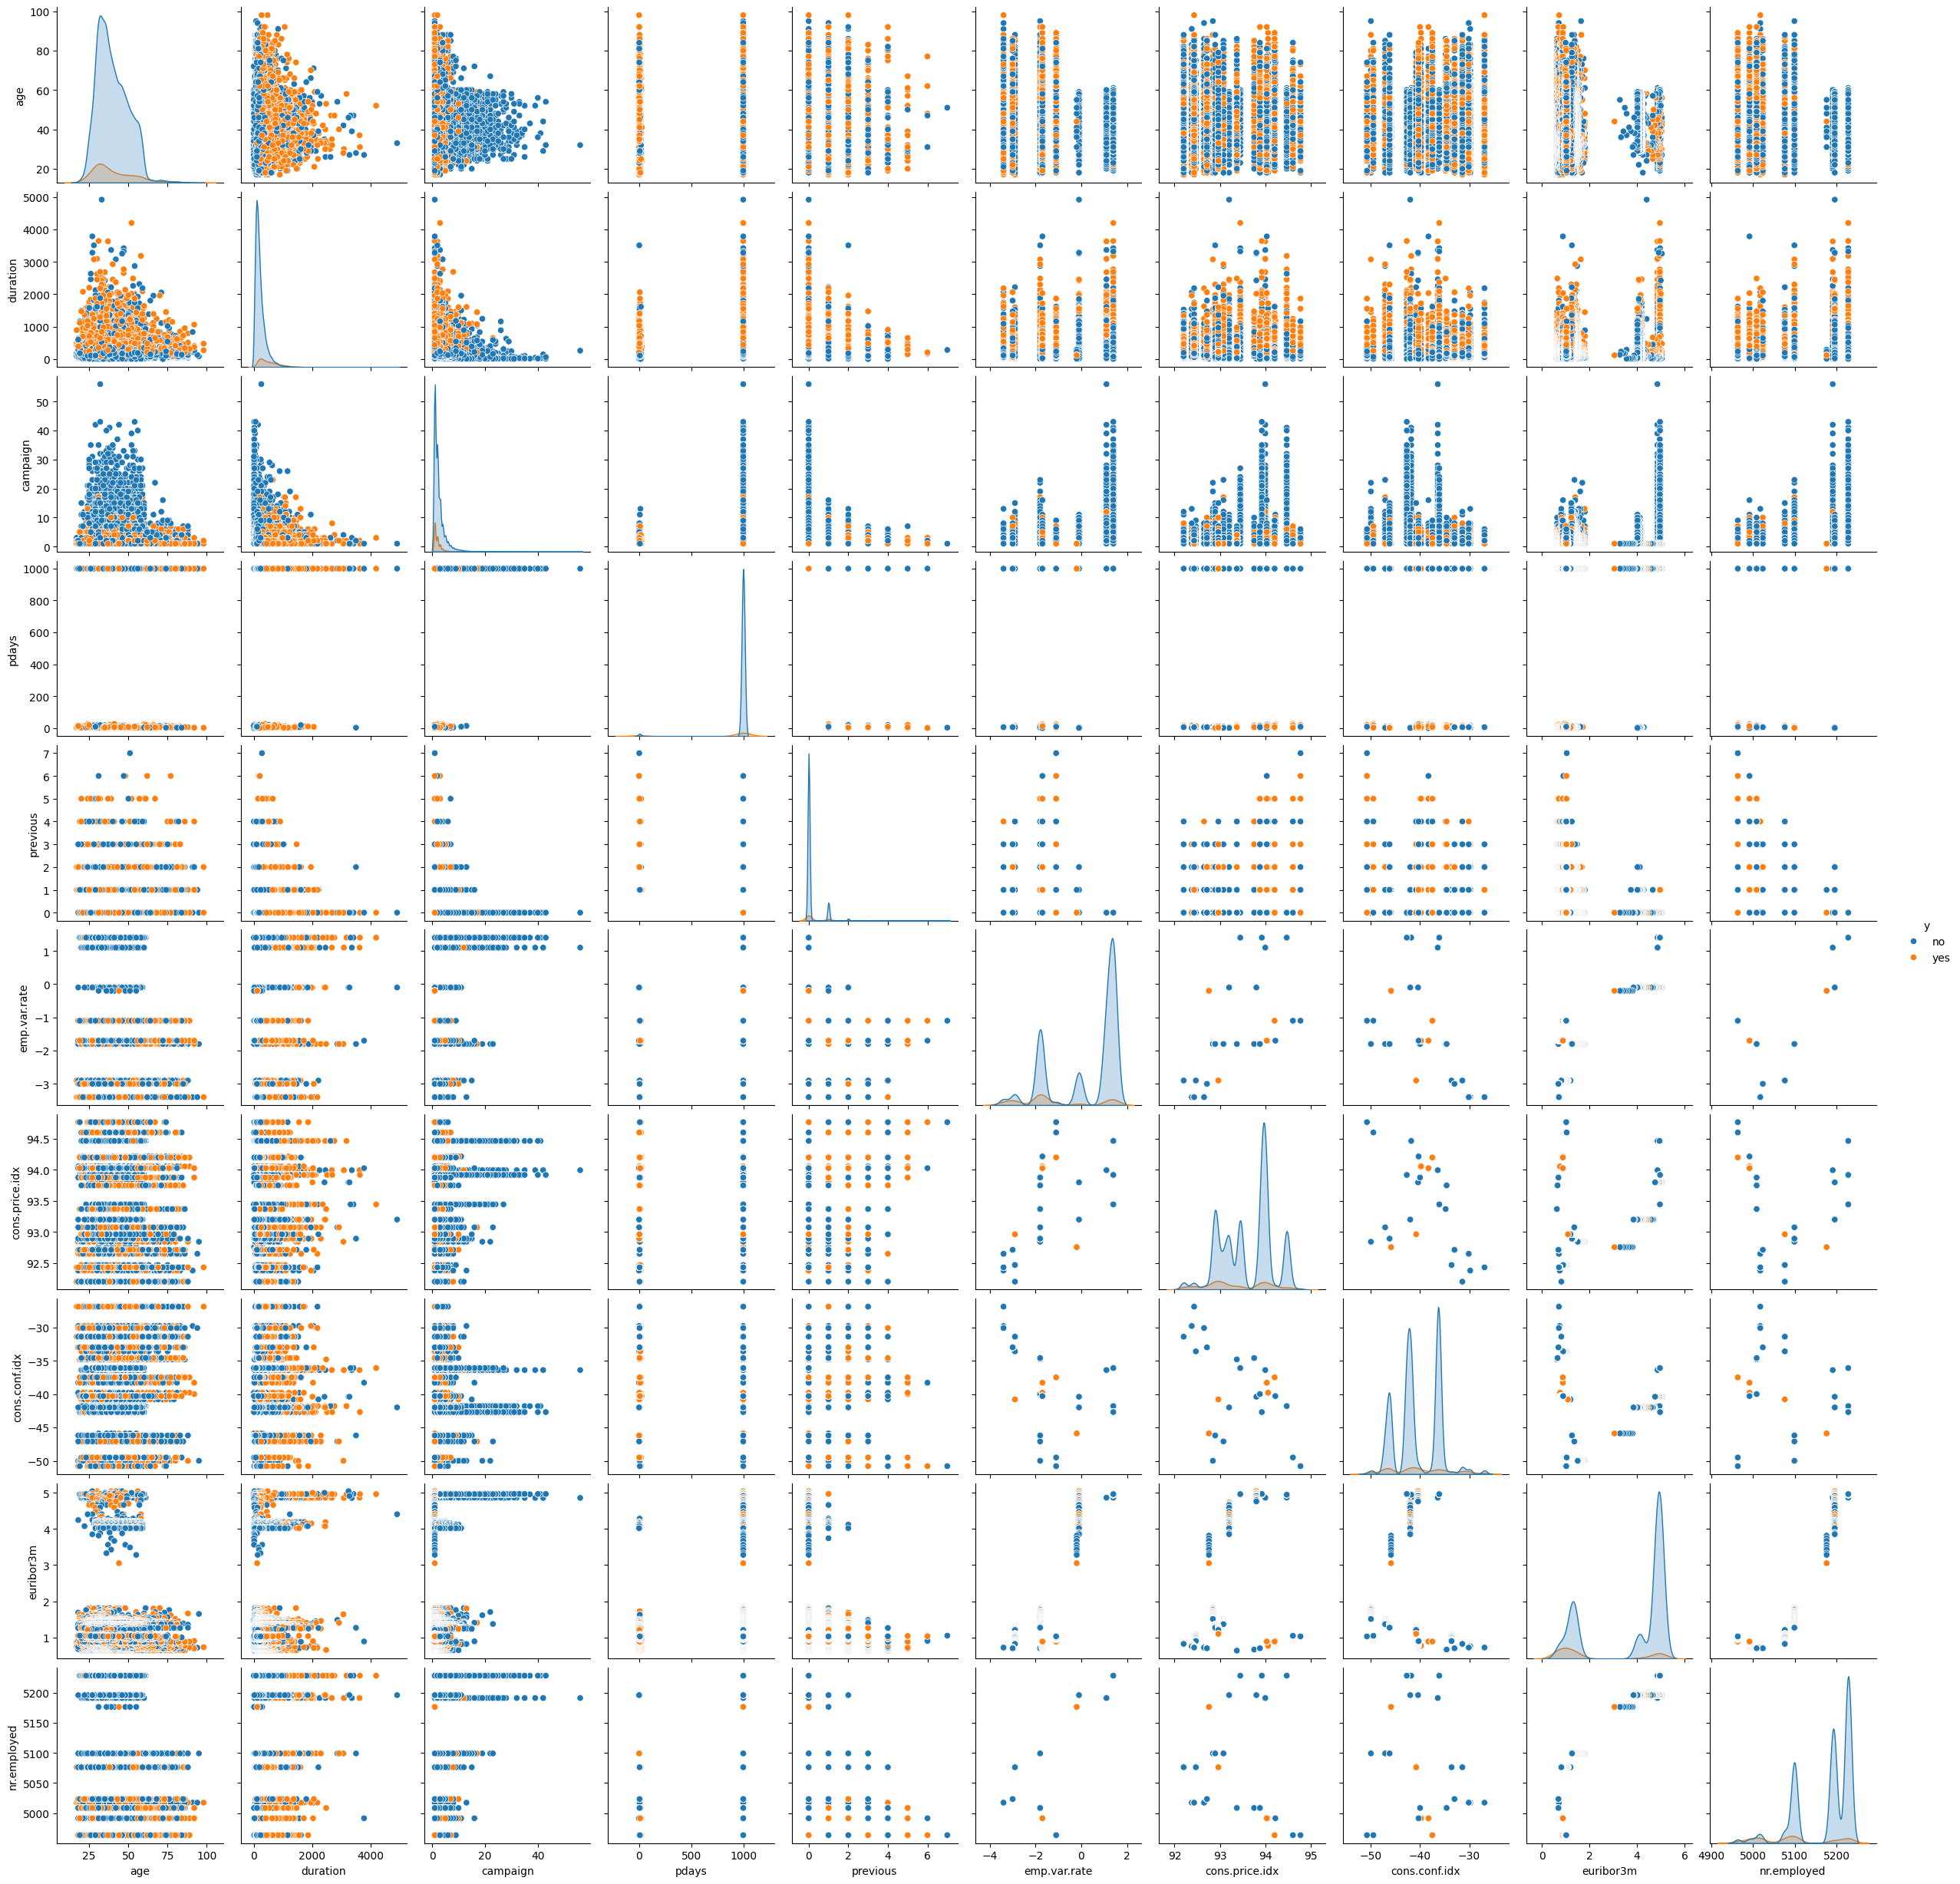

In [ ]:
# Plot the features against y
import seaborn as sns
sns.pairplot(X, hue='y')

According to the pairplots, duration is the biggest indicator of a whether a client has subscribed. But this attribute, as outlined by the data description, is a post-success attribute. That is to say, it will only have a value if a client actually subscribed. Thus, it should be dropped.

In [ ]:
# Drop duration
df = df.drop('duration', axis=1)

Additionally, a second dataframe should be created to exclude the socioeconomic features.

In [ ]:
# Create two sets of data: one with socec, and one without
df_no_socec=df.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [ ]:
# Assigning X and y for two runs: one with socioeconmic features, and one without
y_socec = df['y']
X_socec=df.drop('y', axis=1)

X = df_no_socec.drop('y', axis = 1)
y = df_no_socec['y']

In [ ]:
# Fit the PCA model to the predictor data, without socec features


# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include='object').columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create the preprocessor (similar to how it's defined later in the notebook)
# This preprocessor will handle both categorical encoding and numerical scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

# Apply the preprocessor to the X data before PCA
X_processed = preprocessor.fit_transform(X)

# Now fit and transform the processed data using PCA
pca = PCA()
X_pca = pca.fit_transform(X_processed)

# Explained variance ratio for each component
print(pca.explained_variance_ratio_)

[2.10200208e-01 1.34416922e-01 1.21134889e-01 5.50915009e-02
 5.07030761e-02 3.82745279e-02 3.36070932e-02 3.07391702e-02
 2.99414310e-02 2.64106775e-02 2.53638933e-02 2.49111628e-02
 2.40516161e-02 2.35867361e-02 1.84524402e-02 1.81559469e-02
 1.56402970e-02 1.30766454e-02 1.22356030e-02 9.75948152e-03
 8.44624183e-03 8.06374264e-03 7.08988890e-03 6.61586990e-03
 5.72031836e-03 5.52945918e-03 5.51590409e-03 4.67490930e-03
 4.26524057e-03 4.10184304e-03 3.51456457e-03 3.06443388e-03
 3.00574915e-03 2.84637416e-03 2.35103025e-03 1.92515399e-03
 1.81760202e-03 1.64284105e-03 1.27203732e-03 8.65007292e-04
 8.24037048e-04 4.58988006e-04 3.41323167e-04 2.32014967e-04
 5.32031326e-05 8.90388493e-06]


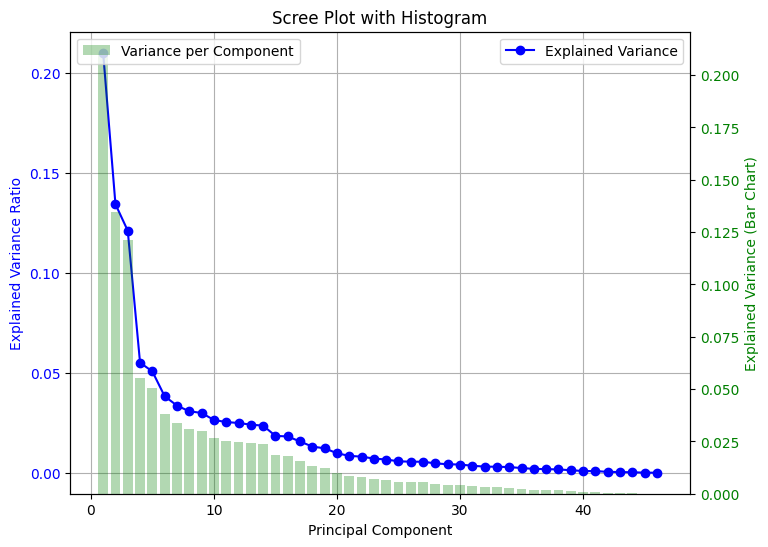

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Scree plot (line plot)
ax1.plot(components, explained_variance, marker='o', linestyle='-', color='b', label="Explained Variance")
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title("Scree Plot with Histogram")
ax1.grid(True)

# Create second y-axis for Histogram
ax2 = ax1.twinx()
ax2.bar(components, explained_variance, alpha=0.3, color='g', label="Variance per Component")
ax2.set_ylabel("Explained Variance (Bar Chart)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Show legend
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

# Display plot
plt.show()

In [ ]:
# Check the variable weights
weights = pca.components_
print(weights)

[[-2.74993664e-02 -2.28122095e-03 -5.28287619e-04 ... -1.41996948e-01
  -6.63245999e-01  6.84334954e-01]
 [ 7.55243618e-03  6.95720860e-03  1.39695759e-02 ...  9.79767436e-02
  -3.84143460e-04 -2.61765108e-02]
 [-9.31871470e-03 -1.81372747e-03 -7.67607791e-04 ...  9.81224931e-01
  -1.28500664e-01  7.99084378e-02]
 ...
 [-2.87167543e-03 -2.13395651e-03 -3.80824352e-03 ... -4.86737821e-04
  -1.81566252e-03 -1.62424677e-04]
 [ 5.40803833e-04 -8.55753740e-04  1.39663815e-03 ...  4.61669796e-05
   3.32855859e-05  1.64612279e-04]
 [-3.84123595e-05 -1.20931243e-06  2.54667945e-05 ...  2.33876282e-05
  -4.02442859e-05  3.11339299e-05]]


In [ ]:
# Set number of components to 0
pca_X = PCA(n_components=20).fit(X_processed)
pca_X.explained_variance_ratio_

array([0.21020021, 0.13441692, 0.12113489, 0.0550915 , 0.05070308,
       0.03827453, 0.03360709, 0.03073917, 0.02994143, 0.02641068,
       0.02536389, 0.02491116, 0.02405162, 0.02358674, 0.01845244,
       0.01815595, 0.0156403 , 0.01307665, 0.0122356 , 0.00975948])

In [ ]:
# Dimensionality reduction on X
X_pca = pca_X.transform(X_processed)

# Store X_pca in a dataframe
df_pca = pd.DataFrame(X_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.317482,1.552662,-0.762412,-0.108519,0.588691,-0.584044,0.443653,-0.309231,0.187591,-0.158450,0.546924,0.271267,0.011509,0.646632,-0.329438,0.088982,-0.121274,-0.171070,-0.006077,0.134137
1,-0.355207,1.640308,-0.764233,-0.072774,0.863204,-0.809432,-0.194729,-0.635518,0.721686,-0.531825,0.360274,0.326493,0.036811,0.617252,0.642391,0.198909,-0.136266,0.101378,0.277395,0.143967
2,-0.400880,-0.237018,-0.601325,-0.068604,0.864093,-0.182526,-0.202614,0.117374,1.321741,-0.574026,0.392639,0.330431,0.053593,0.449745,-0.111400,-0.003064,-0.210977,-0.163861,0.166035,0.264369
3,-0.396939,0.114489,-0.631010,-0.132857,0.873126,-0.156570,0.523478,-0.328613,0.186412,-0.160695,0.571820,0.277619,0.038696,0.613836,-0.207552,0.111116,-0.128187,-0.124786,-0.311225,0.329479
4,-0.322907,1.464490,-0.751638,-0.058016,0.701204,-0.769639,-0.121321,-0.612950,0.922612,-0.533426,0.341673,0.272916,0.003293,0.692035,-0.235694,0.059491,0.873545,-0.129114,0.177498,0.199485


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The objective of this task is to create a model that will predict whether customers will subscribe to the bank's term deposit.

According to the article, this can be done by removing contact-based attributes. The model should also be evaluated with these variables instead. That is to say, the performance of the model with socioeconomic attributes included and excluded will be considered.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# Instantiate LabelEncoder
le = LabelEncoder()

# Use fit_transform to transform y and y_socec
y = le.fit_transform(y)
y_socec = le.fit_transform(y_socec)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# Split the data into train/test
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(df_pca, y, test_size=0.2, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
# Use X and y without PCA to create a model
X_processed_train, X_processed_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
lrbaseline=LogisticRegression()

lrbaseline.fit(X_processed_train, y_train)

# Score the baseline test set
baseline_test=lrbaseline.score(X_processed_test, y_test)
print("Baseline Test Score:", baseline_test)

Baseline Test Score: 0.8982762806506434


In [ ]:
# Score the baseline train set
baseline_score = lrbaseline.score(X_processed_train, y_train)
print("Baseline Train Score:", baseline_score)

Baseline Train Score: 0.8971471927162368


The baseline performance our classifier should hope to beat is 0.897.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
# Create the logistic regression model with PCA data as a baseline
logreg_pca = LogisticRegression()

# Apply the preprocessor to the training data
logreg_pca.fit(X_pca_train, y_pca_train)

LogisticRegression()

In [ ]:
# Fit the model to our train/test data
logreg_pca.fit(X_pca_train, y_pca_train)
logreg_pca.fit(X_pca_test, y_pca_test)

LogisticRegression()

In [ ]:
# Baseline score for training data
lr_pca_baseline=logreg_pca.score(X_pca_train, y_pca_train)
print("LR and PCA Train Score:", lr_pca_baseline)

LR and PCA Train Score: 0.8980880121396054


In [ ]:
# Baseline score for test data
lr_pca_baseline_test=logreg_pca.score(X_pca_test, y_pca_test)
print("LR and PCA Test Score:", lr_pca_baseline_test)

LR and PCA Test Score: 0.8996115562029618


In [ ]:
# Prediction accuracy
y_pred_train = logreg_pca.predict(X_pca_train)
y_pred_test = logreg_pca.predict(X_pca_test)

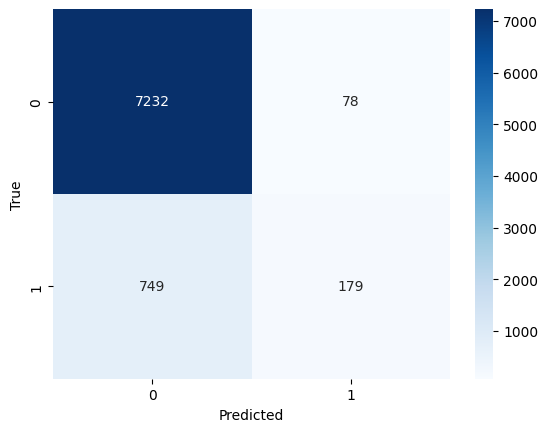

In [ ]:
# Create a confusion matrix to model predicted values vs actual values
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_pca_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

Based on the confusion matrix, the accuracy of the model is 89.96%.

The True Positive (179) indicates that a customer subscribed to a term deposit. A False Positive (78) indicates a customer accepted the marketing contact but changed their mind and did not subscribe to a term deposit. A False Negative (749) implies the customer rejected the campaign but subscribed anyway. And a True Negative (7232) indicates the customer did not accept the marketing campaign and did not subscribe.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'poly', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

In [ ]:

#create the pipeline for models identified above
#conduct a gridsearch for each model, fit the data to the model, capture time, and provide
#metrics for results and parameters in a table

results = []
for name, (model, params) in models.items():
    pipeline = Pipeline([
        (name, model)
    ])

    #perform gridsearch
    start_time = time.time()
    grid_search = GridSearchCV(pipeline, params, cv=6)
    # Fit the grid search with the pca data
    grid_search.fit(X_pca_train, y_pca_train)
    # Recalculate fit_time based on the new grid search results
    fit_time = (time.time() - start_time) / grid_search.n_splits_

    #get the best model
    best_model = grid_search.best_estimator_

    #evaluate the model on training and test sets
    # Use the best_model (the fitted pipeline) with the original data for scoring
    train_score = best_model.score(X_pca_train, y_pca_train)
    test_score = best_model.score(X_pca_test, y_pca_test)
    best_params = grid_search.best_params_

    #append the results in a dataframe
    results.append([name, train_score, test_score, fit_time, best_params])

KeyboardInterrupt: 

In [ ]:
# Create a dataframe to include the results
results_df = pd.DataFrame(results, columns=['name', 'train score', 'test score', 'average fit time', 'best_params'])
results_df.set_index('name', inplace=True)
results_df.sort_values(by='test score', ascending=False, inplace=True)
results_df

,train score,test score,average fit time,best_params
name,,,,
logisticregression,0.898149,0.899612,0.931521,{'logisticregression__C': 0.1}
knn,0.904431,0.893785,2.768913,{'knn__n_neighbors': 7}


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# Use the socec data for PCA
# Identify categorical and numerical columns
categorical_columns = X_socec.select_dtypes(include='object').columns.tolist()
numerical_columns = X_socec.select_dtypes(include=['float64', 'int64']).columns.tolist()

# This preprocessor will handle both categorical encoding and numerical scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

# Apply the preprocessor to the X_socec data before PCA
X_socec_processed = preprocessor.fit_transform(X_socec)

# Now fit and transform the processed data using PCA
pca = PCA()
X_socec_pca = pca.fit_transform(X_socec_processed)

# Explained variance ratio
print(pca.explained_variance_ratio_)

[3.05928483e-01 1.07588605e-01 8.78965710e-02 7.56435522e-02
 6.89987055e-02 4.38207659e-02 3.16237408e-02 2.75335103e-02
 2.13092623e-02 1.90621669e-02 1.89226712e-02 1.75176959e-02
 1.61342206e-02 1.57042992e-02 1.51643542e-02 1.49168250e-02
 1.26538958e-02 1.10360659e-02 9.70730627e-03 8.92265670e-03
 7.57580419e-03 6.33474836e-03 6.02388779e-03 4.98660716e-03
 4.36420393e-03 4.09100145e-03 3.53570463e-03 3.42916307e-03
 3.42111943e-03 3.33544203e-03 2.89878915e-03 2.63434808e-03
 2.48683321e-03 2.17778811e-03 1.89508602e-03 1.69067643e-03
 1.45936151e-03 1.41142801e-03 1.19403039e-03 1.12666345e-03
 9.60016256e-04 7.88613271e-04 5.36538104e-04 4.97323688e-04
 2.96755984e-04 2.68582942e-04 2.11254735e-04 1.43917706e-04
 1.00434038e-04 3.29994787e-05 5.52317107e-06]


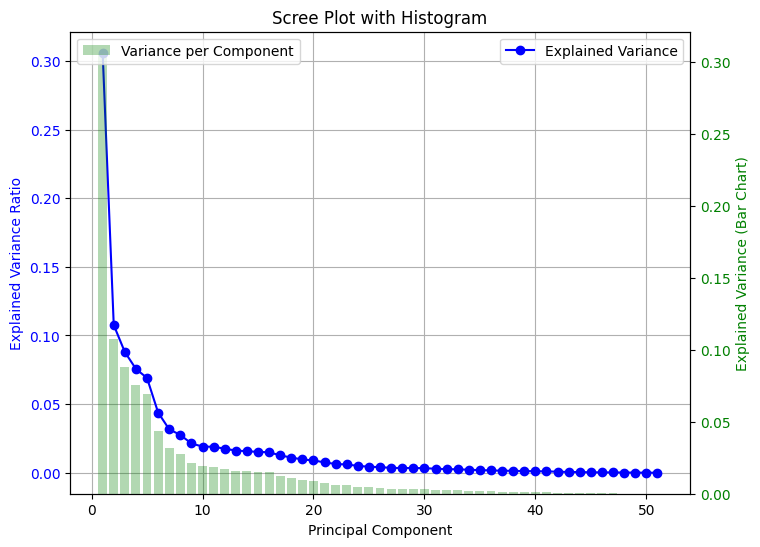

In [ ]:
# Explained variance
explained_variance_socec = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance_socec) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Scree plot (line plot)
ax1.plot(components, explained_variance_socec, marker='o', linestyle='-', color='b', label="Explained Variance")
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title("Scree Plot with Histogram")
ax1.grid(True)

# Create second y-axis for Histogram
ax2 = ax1.twinx()
ax2.bar(components, explained_variance_socec, alpha=0.3, color='g', label="Variance per Component")
ax2.set_ylabel("Explained Variance (Bar Chart)", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Show legend
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

# Display plot
plt.show()

In [ ]:
# Apply the preprocessor to the socec data
preprocessor.fit(X_socec)
X_socec_processed = preprocessor.transform(X_socec)

In [ ]:
# Set the number of components to 17, as in the marketing campaign
pca_X_socec = PCA(n_components=17).fit(X_socec_processed)
pca_X_socec.explained_variance_ratio_

array([0.30592848, 0.10758861, 0.08789657, 0.07564355, 0.06899871,
       0.04382077, 0.03162374, 0.02753351, 0.02130926, 0.01906217,
       0.01892267, 0.0175177 , 0.01613422, 0.0157043 , 0.01516435,
       0.01491682, 0.0126539 ])

In [ ]:
# Dimensionality reduction on X_socec
X_socec_pca = pca_X_socec.transform(X_socec_processed)

# Store X_socec_pca in a new dataframe
df_socec_pca = pd.DataFrame(X_socec_pca)
df_socec_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.321531,-0.956150,1.485039,-0.052548,-0.674192,0.791998,0.092915,0.013452,-0.123206,-0.260431,-0.379086,0.482461,-0.047341,-0.572874,0.630709,-0.064193,-0.292313
1,1.362037,-0.966724,1.510042,0.014138,-0.772025,0.884669,0.157806,0.163030,-0.771532,0.320520,-0.658496,0.761444,-0.420463,-0.356077,0.778971,-0.032590,-0.319210
2,1.298592,-0.391705,0.192105,-0.886772,0.039981,0.846510,0.205560,0.459459,-0.311978,0.981605,0.117840,0.899784,-0.433813,-0.357909,0.644752,0.001684,-0.223136
3,1.319710,-0.517841,0.449810,-0.737906,-0.084808,0.865854,0.179514,0.440151,0.136870,-0.181877,-0.391367,0.379861,-0.076536,-0.585203,0.619254,-0.034058,-0.305917
4,1.318375,-0.914915,1.400945,-0.070851,-0.675162,0.841042,0.129197,0.047068,-0.631984,0.476532,-0.657646,0.870113,-0.381606,-0.361446,0.703309,-0.075465,-0.297559


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_socec_train, X_socec_test, y_socec_train, y_socec_test = train_test_split(df_socec_pca, y_socec, test_size=0.2, random_state=42, stratify=y_socec)

In [ ]:
# Create an SVC model using the best performing attributes from the table above
svc = SVC(C=0.1, kernel='linear')

# Apply X_train_processed to svc
svc.fit(X_socec_train, y_socec_train)

SVC(C=0.1, kernel='linear')

In [ ]:
# SVC training accuracy
y_pred_socec_train_svc = svc.predict(X_socec_train)
train_accuracy_svc = accuracy_score(y_socec_train, y_pred_socec_train_svc)
print("SVC Model training accuracy:", train_accuracy_svc)

SVC Model training accuracy: 0.8974810318664643


In [ ]:
# SVC testing accuracy
y_socec_pred_test_svc = svc.predict(X_socec_test)
test_accuracy_svc = accuracy_score(y_socec_test, y_socec_pred_test_svc)
print("SVC Model testing accuracy:", test_accuracy_svc)

SVC Model testing accuracy: 0.8976693372177713


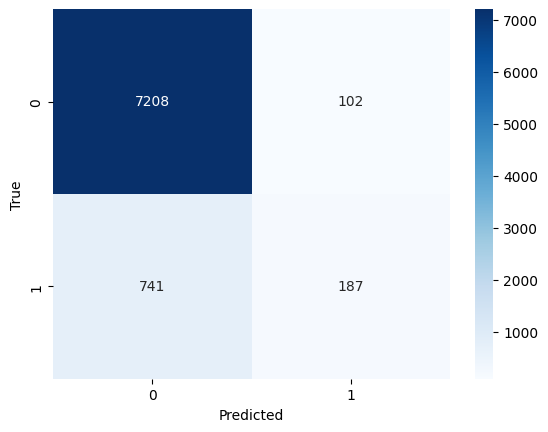

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Create a new confusion matrix for the new model
cm = confusion_matrix(y_socec_test, y_socec_pred_test_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt

The new model is 89.77% accurate--a slight decrease from the base model. But the overall results are consistent. For the marketing campaigns, follow-up calls could be sent to customers after an initial marketing contact to eliminate false positives. Additionally, marketers could request customers to verbally agree to sign up to a term deposit in order to reduce false negatives.

##### Questions